<a href="https://colab.research.google.com/github/NameAtirut/Training/blob/main/Breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing packages

In [ ]:
!pip install pycaret
!pip install shap

     |████████████████████████████████| 358kB 4.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=da130173ba7ff5fbd4bd9a601c758a327d94607096b93301b0932ec1f6e2ab9e
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


## Import the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

URL = 'https://raw.githubusercontent.com/NameAtirut/Training/main/Breast_cancer/Breast_cancer.csv'
ds= pd.read_csv(URL)

## Exploratory Data Analysis (*EDA*)

In [ ]:
ds.shape

(569, 32)

In [ ]:
ds.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Unique classes of the data

In [ ]:
print(f"Labels: {ds.diagnosis.unique()}")

Labels: ['M' 'B']


Check for missing data

In [ ]:
ds.isnull().sum()
ds.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Data Pre-processing (sklearn)
{skip this section if modelling will be done via PyCaret}

*   One-hot encoding




In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(ds.diagnosis)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split

X = ds.drop("diagnosis", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [ ]:
#Feature Scaling to (0,1) scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling: PyCaret

### Pre-process & Compile the model

In [ ]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

# Pre-processing: One-hot encoding
labelencoder_Y = LabelEncoder()
ds.diagnosis = labelencoder_Y.fit_transform(ds.diagnosis)

model = setup(data = ds, target = 'diagnosis', train_size=0.75, silent=True, feature_selection= True, normalize=True, session_id=2962)

,Description,Value
0,session_id,2962
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(569, 32)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9788,0.9910,0.9550,0.9875,0.9703,0.9539,0.9550,0.299
et,Extra Trees Classifier,0.9671,0.9936,0.9425,0.9683,0.9544,0.9287,0.9299,0.471
lightgbm,Light Gradient Boosting Machine,0.9647,0.9899,0.9483,0.9557,0.9511,0.9235,0.9246,0.167
knn,K Neighbors Classifier,0.9626,0.9869,0.9233,0.9749,0.9470,0.9181,0.9205,0.124
rf,Random Forest Classifier,0.9624,0.9874,0.9358,0.9622,0.9474,0.9182,0.9200,0.529
svm,SVM - Linear Kernel,0.9553,0.0000,0.9354,0.9432,0.9381,0.9031,0.9046,0.019
gbc,Gradient Boosting Classifier,0.9553,0.9881,0.9354,0.9418,0.9375,0.9027,0.9040,0.265
ada,Ada Boost Classifier,0.9530,0.9909,0.9421,0.9336,0.9360,0.8990,0.9012,0.152
ridge,Ridge Classifier,0.9483,0.0000,0.8650,0.9941,0.9224,0.8843,0.8916,0.020
lda,Linear Discriminant Analysis,0.9461,0.9932,0.8592,0.9941,0.9177,0.8785,0.8874,0.023


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2962, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best = automl(optimize = 'Accuracy')
mod = create_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9535,0.9583,0.9375,0.9375,0.9375,0.9005,0.9005
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9535,0.9931,0.8750,1.0000,0.9333,0.8979,0.9026
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9767,1.0000,0.9375,1.0000,0.9677,0.9496,0.9508
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9762,0.9901,0.9333,1.0000,0.9655,0.9474,0.9487
8,0.9762,0.9827,0.9333,1.0000,0.9655,0.9474,0.9487
9,0.9762,0.9975,0.9333,1.0000,0.9655,0.9474,0.9487


### Visualisations


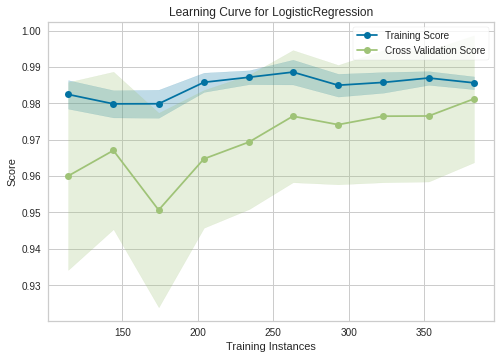

In [ ]:
plot_model(mod, 'learning')

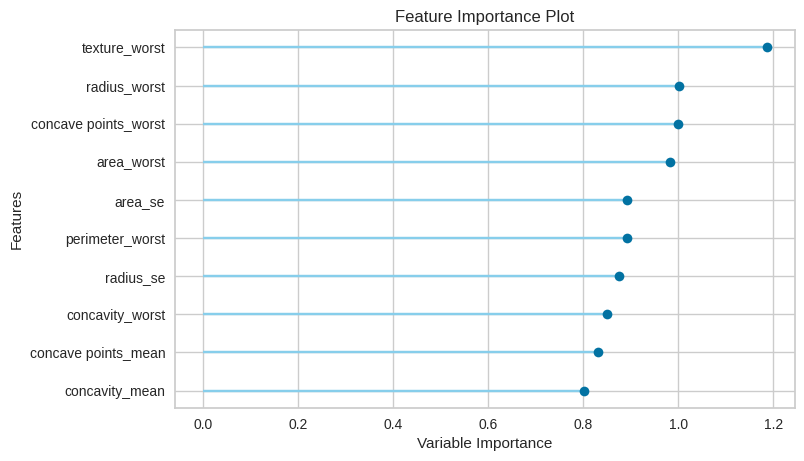

In [ ]:
plot_model(mod, 'feature')

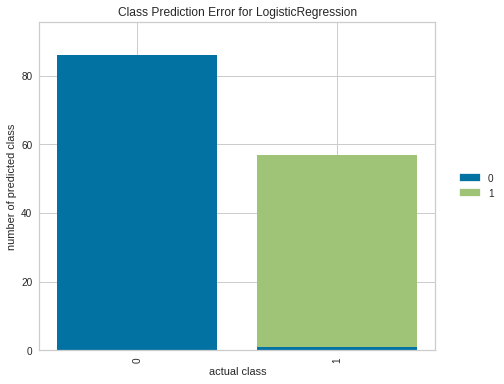

In [ ]:
plot_model(mod, 'error')

### Hyperparameter Tuning

In [ ]:
plot_model(mod,'parameter')

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [ ]:
tuned_model = tune_model(mod, n_iter = 50)
tuned_model = tune_model(mod, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9535,0.9583,0.9375,0.9375,0.9375,0.9005,0.9005
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9535,0.9931,0.8750,1.0000,0.9333,0.8979,0.9026
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9767,1.0000,0.9375,1.0000,0.9677,0.9496,0.9508
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9762,0.9901,0.9333,1.0000,0.9655,0.9474,0.9487
8,0.9762,0.9827,0.9333,1.0000,0.9655,0.9474,0.9487
9,0.9762,0.9975,0.9333,1.0000,0.9655,0.9474,0.9487


In [ ]:
plot_model(tuned_model,'parameter')

,Parameters
C,0.474
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [ ]:
prediction = predict_model(tuned_model)
prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.986,0.9994,0.9821,0.9821,0.9821,0.9706,0.9706


,id,fractal_dimension_se,symmetry_worst,concave points_se,area_se,compactness_mean,concavity_worst,smoothness_mean,compactness_worst,concavity_mean,smoothness_se,perimeter_se,texture_mean,smoothness_worst,fractal_dimension_worst,radius_worst,concavity_se,texture_se,fractal_dimension_mean,radius_se,texture_worst,concave points_worst,compactness_se,radius_mean,area_mean,symmetry_mean,area_worst,concave points_mean,perimeter_worst,diagnosis,Label,Score
0,-0.147644,-0.181721,-0.754873,2.618526,2.380958,0.245561,-0.211775,-0.711412,-0.337480,0.395668,0.726316,2.536798,-0.748061,-0.903860,-1.183668,1.233963,0.367184,-1.030041,-1.562048,2.647052,-1.259451,0.951940,0.273802,1.512194,1.548089,-0.298502,1.140428,1.251370,1.214451,1,1,0.9995
1,-0.220975,-0.298303,0.040491,-0.674631,0.074276,-0.714414,-0.588176,-1.051740,-0.621776,-0.696693,-0.982995,-0.179830,0.951508,-0.659790,-0.008265,0.641437,-0.643592,-0.063751,-0.850117,-0.053472,1.344864,-0.227635,-0.879454,0.592553,0.473473,-1.047589,0.517127,-0.404297,0.528678,1,1,0.8900
2,-0.220692,0.162194,0.248388,1.430665,0.343326,0.397497,0.510635,1.594176,0.338718,0.638668,2.123138,1.291551,0.730332,1.720966,0.462217,0.057257,0.467233,1.551387,0.762317,0.989309,1.365932,0.794562,0.432584,-0.060189,-0.151492,0.028564,-0.102742,0.431627,0.161730,1,1,0.9926
3,-0.220523,-1.060381,-0.991120,-1.085689,-0.648556,-1.354953,-1.077919,-1.380911,-1.244049,-0.972093,-0.565283,-0.799740,-1.181101,-1.430538,-1.297951,-0.681314,-0.636735,-1.089408,-0.915708,-0.785508,-1.476613,-1.456845,-1.069234,-0.521460,-0.532933,-0.537647,-0.633541,-1.139717,-0.740602,0,0,0.9999
4,-0.220249,-0.321983,0.215314,-0.945541,-0.145589,-0.726829,-0.980756,-1.061504,-0.571642,-0.918304,0.362965,0.482291,1.177341,-0.561306,-0.449375,-0.643760,-0.588736,1.212644,0.012125,0.556267,0.951057,-1.243174,-0.368371,-0.916006,-0.831504,0.527956,-0.647091,-1.058578,-0.671423,0,0,0.9840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-0.228052,0.258374,-0.044558,0.687848,1.536921,0.088066,0.259545,0.575980,-0.169347,0.729793,0.311784,1.284918,-0.473336,0.718993,-0.006129,1.279863,0.054881,0.624210,-0.145019,1.397107,-0.110441,0.796076,-0.243188,1.358437,1.308753,0.492787,1.237988,0.989866,1.178357,1,1,0.9997
139,-0.220949,-0.646954,0.168064,-0.108374,0.217437,-0.616027,0.092152,0.106633,-0.426131,-0.178293,-0.446073,0.259775,0.227445,0.551998,-0.134296,0.616401,-0.364016,0.028792,-0.542661,0.352150,0.858682,0.697714,-0.752049,0.203809,0.134514,-0.843612,0.495447,0.100963,0.516647,1,1,0.9849
140,-0.220575,0.720328,0.227913,1.574698,1.550681,0.408614,-0.195877,-0.498706,0.182813,0.113054,-0.128498,2.039302,0.693080,-0.861041,-0.525207,0.891800,0.458817,0.715007,-1.168505,1.928073,0.268781,0.575141,1.859455,0.960990,0.922226,0.992178,0.779094,0.687650,0.952774,1,1,0.9951
141,-0.220416,0.263110,-0.860397,-1.073228,-0.912570,-0.828551,-0.396936,-1.217023,-0.416349,-0.641511,-0.510606,-0.958938,0.588313,-1.066574,0.394395,-1.283228,0.177371,-0.072482,0.553247,-1.188955,0.390327,-1.349102,0.067331,-1.328829,-1.109133,-1.940867,-1.016736,-1.137708,-1.191467,0,0,0.9999


Finalise the model

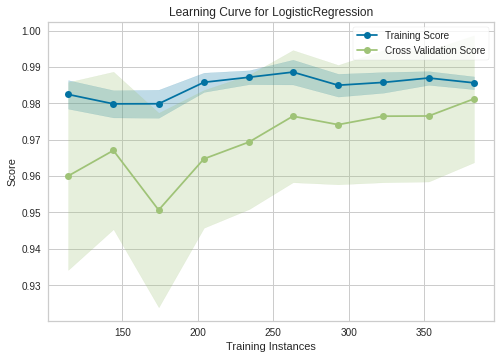

In [ ]:
final_model = finalize_model(tuned_model)
plot_model(final_model, 'learning')

# Save the model

*   PyCaret
*   Pickle


In [ ]:
save_config('best_config')
save_model(final_model, 'best_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                                     top_features_to_pick=0.19999999999999996)),
                 ('fix_multi', 'passthrough'), ('dfs', 'passthrough'),
                 ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegr

In [ ]:
import pickle

with open("best_model.pickle", "wb") as f:
    pickle.dump(final_model, f)

Loading the model

*   PyCaret
*   Pickle



In [ ]:
loaded = load_model('best_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
pickle_in = open("best_model.pickle", "rb")
loaded_model = pickle.load(pickle_in)